<a href="https://colab.research.google.com/github/vivirocha/Bootcamp_MachineLearning/blob/main/DesafioFinalML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Desafio Final - Eng. Machine Learning - IGTI**

Para este desafio final, utilizaremos o banco de dados Cars ([disponível aqui](https://drive.google.com/drive/folders/1nb7AcncQvt-OmGiTIe7TepBaaZn30ZXN?usp=sharing)). 
<br>
<br>
**Enunciado** <br>
Para todo engenheiro de Machine Learning é fundamental que todos os sete passos para a construção de uma solução sejam seguidos. Nesse sentido, saber percorrer todas essas etapas e, ao final, identificar a melhor estratégia, é papel primordial para esse profissional.
<br> 
Neste desafio final vamos empregar boa parte dos conceitos mostrados no decorrer de todos os módulos do Bootcamp para a análise e a classificação de veículos do conhecido dataset “cars”. <br> \Esse dataset contém um conjunto de informações sobre vários veículos pesquisados. Existem dados, por exemplo, sobre a potência do veículo, sobre a origem e cilindradas cúbicas.
Para essa análise, vamos empregar os conceitos de redução da dimensionalidade com o PCA, clusterização com o K-Means e classificações com algoritmos supervisionados. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
cars = pd.read_csv("cars.csv")

In [3]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [5]:
cars.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [6]:
nulos = cars.isnull

In [7]:
cars.isna

<bound method DataFrame.isna of       mpg  cylinders cubicinches   hp weightlbs  time-to-60  year     brand
0    14.0          8         350  165      4209          12  1972       US.
1    31.9          4          89   71      1925          14  1980   Europe.
2    17.0          8         302  140      3449          11  1971       US.
3    15.0          8         400  150      3761          10  1971       US.
4    30.5          4          98   63      2051          17  1978       US.
..    ...        ...         ...  ...       ...         ...   ...       ...
256  17.0          8         305  130      3840          15  1980       US.
257  36.1          4          91   60      1800          16  1979    Japan.
258  22.0          6         232  112      2835          15  1983       US.
259  18.0          6         232  100      3288          16  1972       US.
260  22.0          6         250  105      3353          15  1977       US.

[261 rows x 8 columns]>

In [8]:
cars['cubicinches']=pd.to_numeric(cars['cubicinches'], errors='coerce')
cars['weightlbs']=pd.to_numeric(cars['weightlbs'], errors='coerce')
cars['brand']=pd.to_numeric(cars['brand'], errors='coerce')

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        0 non-null      float64
dtypes: float64(4), int64(4)
memory usage: 16.4 KB


In [10]:
cars['cubicinches'].isnull()


0      False
1      False
2      False
3      False
4      False
       ...  
256    False
257    False
258    False
259    False
260    False
Name: cubicinches, Length: 261, dtype: bool

In [11]:
cars.loc[[180]]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
180,19.8,6,NaN,85,2990.0,18,1980,NaN


In [12]:
cars['cubicinches']

0      350.0
1       89.0
2      302.0
3      400.0
4       98.0
       ...  
256    305.0
257     91.0
258    232.0
259    232.0
260    250.0
Name: cubicinches, Length: 261, dtype: float64

In [13]:
cars['weightlbs'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
256    False
257    False
258    False
259    False
260    False
Name: weightlbs, Length: 261, dtype: bool

In [14]:
cars.isnull().sum()

mpg              0
cylinders        0
cubicinches      2
hp               0
weightlbs        3
time-to-60       0
year             0
brand          261
dtype: int64

In [15]:
valores = {'cubicinches': cars['cubicinches'].mean(), 'weightlbs': cars['weightlbs'].mean(), 'brand': cars['brand'].mean()}
cars=cars.fillna(value=valores)

In [16]:
cars.isnull().sum()

mpg              0
cylinders        0
cubicinches      0
hp               0
weightlbs        0
time-to-60       0
year             0
brand          261
dtype: int64

In [17]:
cars.mean()

mpg              23.144828
cylinders         5.590038
cubicinches     200.918919
hp              106.360153
weightlbs      3009.833333
time-to-60       15.547893
year           1976.819923
brand                  NaN
dtype: float64

In [18]:
cars.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,0.0
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923,NaN
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696,NaN
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000,NaN
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000,NaN
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000,NaN
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000,NaN
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000,NaN


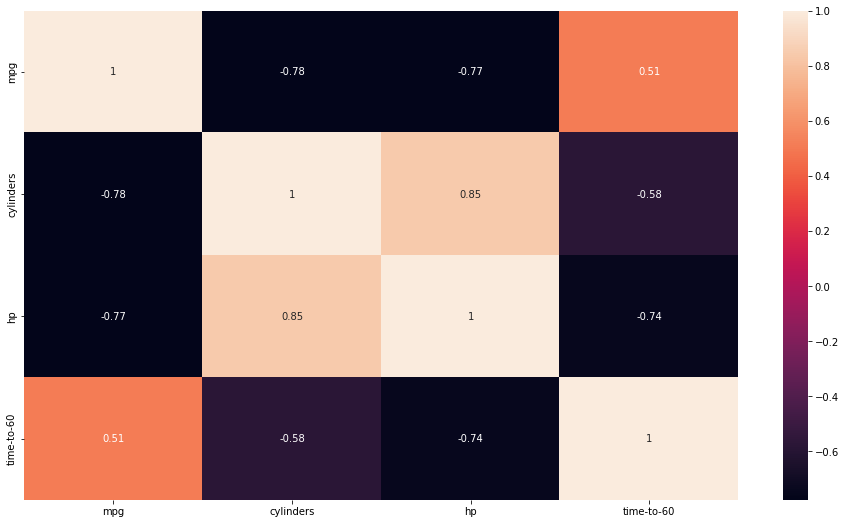

In [19]:
plt.rcParams['figure.figsize'] = [16,9]
matriz_correlacao=cars[['mpg', 'cylinders', 'hp', 'time-to-60']].corr()
sns.heatmap(matriz_correlacao, annot=True)
plt.show()

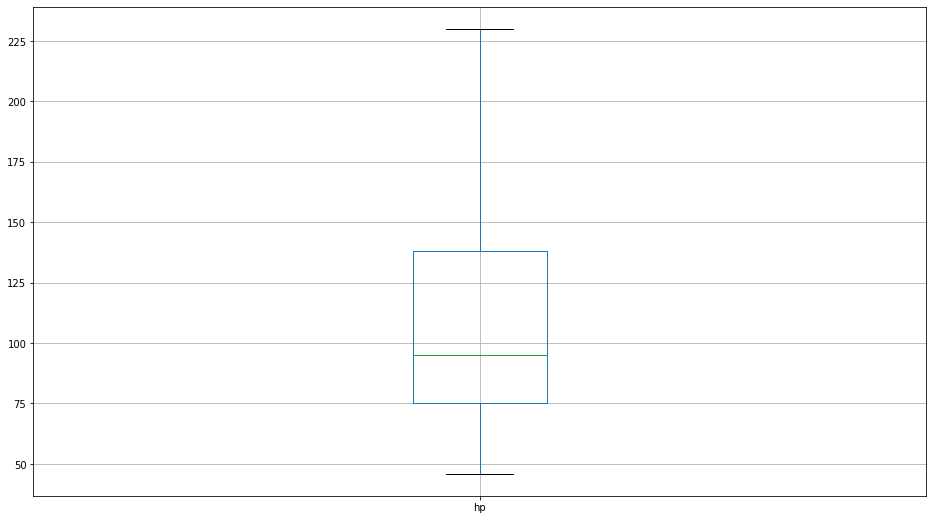

In [20]:
cars[['hp']].boxplot()

In [48]:
normaliza = StandardScaler()


In [49]:
hp=normaliza.fit_transform((cars['hp'].values).reshape(-1,1))